<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/CV2_Utils_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 08/25/2021-1
# from __future__ import absolute_import
from IPython.display import clear_output, display
import glob, os, shutil, sys, uuid
from os.path import *

try:
    from google.colab import drive, files
    from google.colab.patches import cv2_imshow
except Exception as err:
    pass

try: 
    from matplotlib import pyplot as plt
except Exception as err:
    %pip install matplotlib
    from matplotlib import pyplot as plt

try: 
    import cv2
    from cv2 import COLOR_BGR2RGBA
except Exception as err:
    print(err)
    %pip install opencv-python-headless # works.
    # %pip install opencv-contrib-python-headless
    import cv2
    from cv2 import COLOR_BGR2RGBA, IMREAD_UNCHANGED

import numpy as np

if exists('/content/sample_data'):
    shutil.rmtree('/content/sample_data')

contentPth = os.getcwd()
tensorflowImagesPath = join(contentPth, 'TensorflowImages')
resizedImagesPath = join(contentPth, 'TensorflowResizedImages')

if exists(resizedImagesPath):
    pass
    # shutil.rmtree(resizedImagesPath)

try:
    drive.flush_and_unmount()
    drive.mount('/content/gdrive/', force_remount=True)
    mydrivePth = '/content/gdrive/MyDrive'
    os.chdir(mydrivePth)
    gdriveTFImagesPth = join(mydrivePth, 'TensorflowImages')
    gdriveResizedImagesPth = join(mydrivePth, 'TensorflowResizedImages')
    
    os.chdir(mydrivePth)
    from TarfileFunctions import *
    from BashColors import C
    
    if not exists(tensorflowImagesPath):
        shutil.copytree(gdriveTFImagesPth, tensorflowImagesPath)
        # tff.listTarfiles()
        os.chdir(contentPth)
        # tff.extractTarfiles('Juno_Original_Images.tar.gz')

    gdrive_resized_images = '/content/gdrive/MyDrive/TensorflowResizedImages'
    if not exists(resizedImagesPath):
        try: 
            pass
            # shutil.copytree(gdrive_resized_images, resizedImagesPath)
        except Exception as err:
            print(err)
    os.chdir(contentPth)

except Exception as err:
    # print(err)
    os.chdir(contentPth)
    from TarfileFunctions import *
    from BashColors import C
    tarfilePath=join(contentPth, 'Juno_Original_Images.tar.gz')
    if exists(tarfilePath) and not exists(tensorflowImagesPath):
        tff.extractTarfiles('Juno_Original_Images.tar.gz')

rootPth = expanduser("~")

resizedImagesPath = join(contentPth, 'TensorflowResizedImages')
print(tensorflowImagesPath)
os.chdir(tensorflowImagesPath)
tfImageGlob = glob.glob('**', recursive=True)

os.chdir(contentPth)
cv2ImagesPath = join(contentPth, 'CV2Images')
cv2EnemyPath = join(cv2ImagesPath, 'Enemy')
cv2FriendlyPath = join(cv2ImagesPath, 'Friendly')
if not exists(cv2ImagesPath):
    os.mkdir(cv2ImagesPath)
    os.mkdir(cv2EnemyPath)
    os.mkdir(cv2FriendlyPath)

print(f'cv2: {C.IBlue}{cv2.__version__}{C.ColorOff}')
print(f'cwd: {C.IBlue}{os.getcwd()}')

# os.chdir(mydrivePth)


Mounted at /content/gdrive/
/content/TensorflowImages
cv2: 4.1.2
cwd: /content


In [2]:
%%writefile CV2_Utils.py

import cv2
import numpy as np
from matplotlib import pyplot as plt
from os.path import abspath, join, split

class CV2_Utils:
    ''' '''
    # import cv2
    # import numpy as np
    # from matplotlib import pyplot as plt

    __all__ = ['cvu']
    
    def __init__(self):
        self.cvu = CV2_Utils
        # self.zeroPixel = zeroPixel
        # self.originalImageZeroPixel = originalImageZeroPixel

    def cv2ShowTwoImages(self, img1, img2):
        ''' '''
        img1 = cv2ResizeImage(img1)
        img2 = cv2ResizeImage(img2)
        combinedImage = cv2.hconcat([img1, img2])
        try:
            cv2.waitKey(100)
            cv2.destroyAllWindows()
            cv2_imshow(combinedImage)
        except: matPlotCompareTwoImages(img1, img2)

    def matPlotShowSingleImage(self, thisImage):
        ''' '''
        thisImage = cv2.cvtColor(thisImage, cv2.COLOR_BGR2RGBA)

        fig=plt.figure()
        ax1=fig.add_subplot(1,1,1)
        ax1.imshow(thisImage)
        ax1.axis('off')

    def matPlotCompareTwoImages(self, thisImage, compareImage):
        ''' '''
        thisImage = cv2.cvtColor(thisImage, cv2.COLOR_BGR2RGBA)
        compareImage = cv2.cvtColor(compareImage, cv2.COLOR_BGR2RGBA)

        fig=plt.figure()
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(thisImage)
        ax1.axis('off')
        # ax1.set_title('Original Image')

        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(compareImage)
        ax2.axis('off')
        # ax2.set_title('New Image')
        plt.show()

    def cv2ResizeImage(self, thisImage, newSize=(224,224)):
        '''return resized_image'''
        resized_image = cv2.resize(thisImage,newSize,interpolation=cv2.INTER_CUBIC)
        return resized_image

    def cv2CreateImageWithColor(self, pxColor, silent=True):
        '''return save_path'''
        bgImagePath = join(contentPth, 'TensorflowImages/backgroundImage224.png')
        bgImage = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
        save_path = join(contentPth, 'bgImage.png')
        # print(save_path)
        bgImage = np.copy(bgImage)
        # print(bgImage[0][0])

        for px in bgImage:
            bgImage[:] = pxColor
            cv2.waitKey(100)

        cv2.imwrite(save_path, bgImage)
        if not silent:
            print(f'shape: {bgImage.shape}')
            # cv2_imshow(bgImage)
            matPlotCompareTwoImages(bgImage, bgImage)
        return save_path

    def cv2ZoomImage(self, thisImage, newScale=1, silent=True):
        '''return zoomImage'''
        zeroPixel = thisImage[0][0]
        angle = 0
        width, height, _ = thisImage.shape
        rotPoint = width//2, height //2
        dimentions = width, height
        rotPoint = width//2, height//2
        rotMatrix = cv2.getRotationMatrix2D(rotPoint, angle, scale=newScale)
        zoomImage = cv2.warpAffine(thisImage, rotMatrix, dimentions)
        zoomImage = cv2FillImage(zoomImage)
        if not silent:
            print('cv2ZoomImage()')
            matPlotCompareTwoImages(thisImage, zoomImage)
        return zoomImage

    def cv2Rotation(self, thisImage,
                    angle=0, rotPoint=None, newScale=1, silent=True):
        '''return rotImage'''
        thisImage = np.copy(thisImage)
        zeroPixel = thisImage[[0][0]]
        width, height, _ = thisImage.shape
        if rotPoint == None:
            rotPoint = width//2, height//2
            rotMat = cv2.getRotationMatrix2D(rotPoint, angle, scale=newScale)
            dimentions = width, height
            rotImage = cv2.warpAffine(thisImage, rotMat, dimentions)
            rotImageZeroPixel = rotImage[0][0]
            if not silent:
                print('cv2Rotation()')
                matPlotCompareTwoImages(thisImage, rotImage)
                cv2.waitKey(100)
            cv2.waitKey(100)
            cv2.destroyAllWindows()
            return rotImage

    def cv2Translate(self, thisImage, x=0, y=0, silent=True):
        '''-x shift left -y shift up\nx shift right y shift down\n
        return newImage'''
        thisImage = np.copy(thisImage)
        zeroPixel=thisImage[0][0]
        translateMatrix = np.float32([[1,0,x],[0,1,y]])
        dimentions = (thisImage.shape[1], thisImage.shape[0])
        newImage = cv2.warpAffine(thisImage, translateMatrix, dimentions)

        if not silent:
            print('cv2Translate()')
            matPlotCompareTwoImages(thisImage, newImage)

        try:
            cv2.waitKey(100)
            cv2.destroyAllWindows()
        except: pass
        return newImage

    def cv2EdgeDetection(self, thisImage, t1=50, t2=100, silent=True):
        '''return canny'''

        # gray = cv2.cvtColor(thisImage, cv2.COLOR_BGR2GRAY)
        # thisImage = cv2.GaussianBlur(gray,(3,3),0)

        canny = cv2.Canny(thisImage, t1, t2)
        if not silent:
            matPlotCompareTwoImages(thisImage, canny)
        try:
            cv2.waitKey(100)
            cv2.destroyAllWindows()
        except: pass
        return canny

    def changeBackgroundColors(self, path, image=None):
        '''returns newImg'''
        splitPath = split(path)
        filePath = splitPath[0]
        fileName = splitPath[1]
        fileName = 'new_' + fileName
        print(filePath)
        print(fileName)
        saveImagePath = join(contentPth, fileName)

        print(f'saveImagePath: {saveImagePath}')
        original_image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        originalZeroPixel = originalImage[0][0]
        plt.imshow(original_image)
        newImg = np.copy(original_image)

        zeroPixel = newImg[0][0]
        print('newImg zeroPixel:', zeroPixel)
        print('originalZeroPixel:', originalZeroPixel)

        width, height, channels = original_image.shape
        print(width, height, channels)

        for x in range(0, width):
            for y in range(0, height):
                channels_xy = newImg[y][x]
                # print(channels_xy)
                if all(channels_xy == zeroPixel):
                    newImg[y][x] = originalZeroPixel

        cv2.imwrite(saveImagePath, newImg)
        newImg = cv2.imread(saveImagePath, -1)
        try:
            cv2.waitKey(100)
            cv2.destroyAllWindows()
        except: pass
        return newImg

    def cv2FillImage(self, thisImage, silent=True):
        '''returns filledImage'''
        print('cv2FillImage')
        # matPlotShowSingleImage(thisImage)
        zp = thisImage[0][0]
        bgImagePath = cv2CreateImageWithColor(pxColor=zeroPixel)
        # print(zp)
        img1 = np.copy(thisImage)
        img2 = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
        filledImage = cv2.bitwise_or(img1, img2)
        filledImage = cv2.bitwise_or(filledImage, img2)
        if not silent:
            cv2ShowTwoImages(img1, filledImage)
        try:
            cv2.waitKey(100)
            cv2.destroyAllWindows()
        except: pass
        return filledImage


    def cv2AddTwoImages(self, imagePath1, imagePath2, alfa=1, beta=1, gamma=0.0):
        '''return  addImage'''
        # read two imagePaths
        src1 = cv2.imread(imagePath1)
        src2 = cv2.imread(imagePath2)
        try:
            # add or blend the imagePaths
            addImage = cv2.addWeighted(src1, alfa, src2, beta, gamma)
            # save the output imagePath
            # cv2.imwrite('image.png', dst)
            return addImage
        except Exception as err:
            print(f'{C.IRed}{err}')

    def cv2FlipImage(self, thisImage, axes=0, silent=True):
        '''axes=0 flip vert\naxes=1 flip horiz\naxes=-1 flip vert and horiz'''
        if axes == 0:
            flipImg = cv2.flip(thisImage, 0)
            if not silent:
                print('flip vertical')
                cv2ShowTwoImages(thisImage, flipImg)
        elif axes == 1:
            flipImg = cv2.flip(thisImage, 1)
            if not silent:
                print('flip horizontal')
                cv2ShowTwoImages(thisImage,flipImg)
        elif axes == -1:
            flipImg =cv2.flip(thisImage, -1)
            if not silent:
                print('flip vertical and horizontal')
                cv2ShowTwoImages(thisImage,flipImg)
        cv2.waitKey(100)
        cv2.destroyAllWindows()
        return flipImg

    def cv2GetUniqueFileName(self, extension='.png'):
        '''return uniqueName'''
        uniqueName = str(uuid.uuid4()) + extension
        return uniqueName

    def cv2SaveImage(self, savePath, thisImage, writeFile=False):
        ''' '''
        if savePath.__contains__('Enemy') or savePath.__contains__('enemy'):
            print('Enemy')
            print(savePath)
            dirPath, fileName = split(savePath)
            print(dirPath, fileName)
            newPath = join(cv2EnemyPath, fileName)
            if writeFile:
                cv2.imwrite(newPath, thisImage)

        elif savePath.__contains__('Friendly') or savePath.__contains__('friendly'):
            print('Friendly')
            print(savePath)
            dirPath, fileName = split(savePath)
            print(dirPath, fileName)
            newPath = join(cv2FriendlyPath, fileName)
            if writeFile:
                cv2.imwrite(newPath, thisImage)

        else: 
            print('Path must include either enemy or friendly')
            print(savePath)
            # cv2.imwrite(savePath, thisImage)
        
cvu = CV2_Utils()

Writing CV2_Utils.py


/content/TensorflowImages/Enemy/enemy_1.png


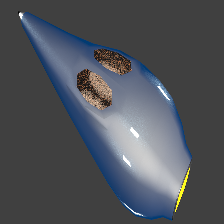


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_10.png


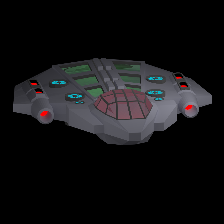


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_11.png


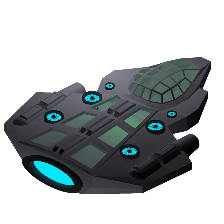


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_2.png


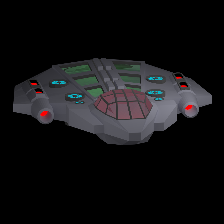


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_3.png


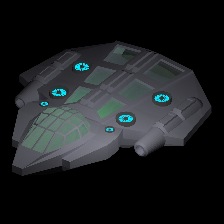


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_4.png


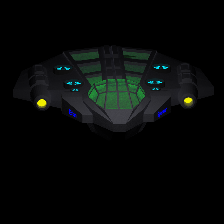


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_6.png


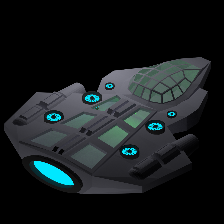


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_8.png


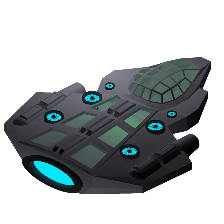


(224, 224, 4) 

/content/TensorflowImages/Friendly/friendly_9.png


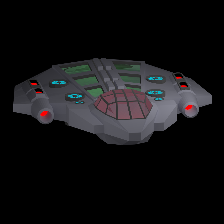


(224, 224, 4) 

/content/TensorflowImages/backgroundImage224.png


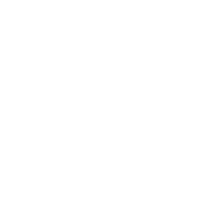


(224, 224, 4) 



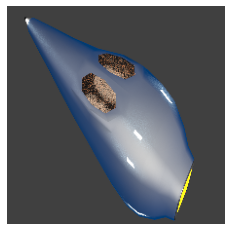

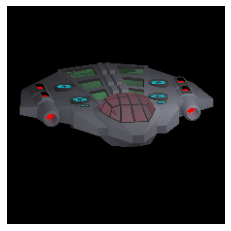

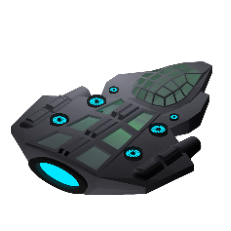

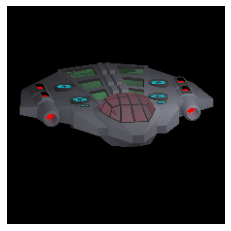

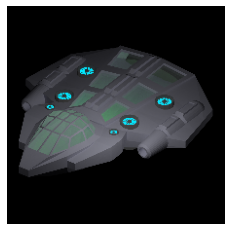

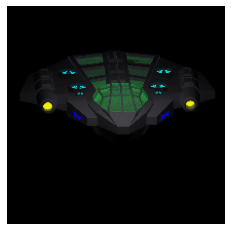

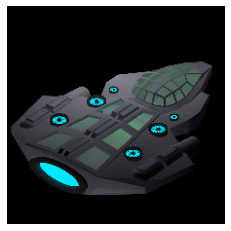

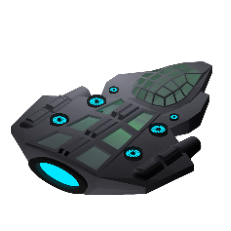

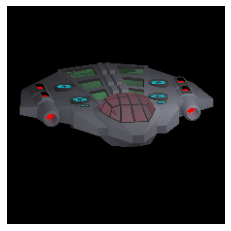

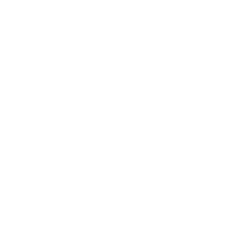

In [3]:
import CV2_Utils as cvu
from CV2_Utils import *
tfImagePathList=[]

os.chdir(tensorflowImagesPath)
tfImageGlob = glob.glob('**', recursive=True)
for pth in sorted(tfImageGlob):
    if pth.endswith('.png'):
        fullPath = abspath(pth)
        tfImagePathList.append(fullPath)
        print(fullPath)
        img = cv2.imread(fullPath, cv2.IMREAD_UNCHANGED)
        img = cvu.cv2ResizeImage(img)
        cv2_imshow(img)
        cvu.matPlotShowSingleImage(img)
        print()
        os.remove(fullPath)
        cv2.waitKey(500)
        # cvu.cv2SaveImage(savePath=fullPath, thisImage=img, writeFile=True)
        print(img.shape, '\n')
        cv2.waitKey(500)
        cv2.destroyAllWindows()

In [4]:
path = tfImagePathList[0]
img = cv2.imread(path)